# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Three observable trends
Based on the information provided here, it is clear that there is a direct correlation with temperature and distance from the equator.  AS the latitude increases from 0 the temperatures of the locations as a whole decrease, while as the latitude decreases from 0, the temperatures go down. There is a strong positive correlation moving south to north towards the equator and a stong negative correlation moving from the equator north.
There does not appear to be any other strong correlations in the data observed here.  

In [1]:
!pip install citipy
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
#from config import api_key
from api_keys import weather_api_key
from pprint import pprint
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [2]:
key=weather_api_key


## Generate Cities List

In [27]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))


606


In [4]:
#lists for different descriptors
City = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lon = []
maxTemp = []
windspeed = []
index = 0
counter = 1




### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [5]:
url="http://api.openweathermap.org/data/2.5/weather?"
units='imperial'
qurl = f"{url}appid={key}&units={units}&q="
#qurl=url + "appid="+key+"&q="
print(qurl)

http://api.openweathermap.org/data/2.5/weather?appid=2dc0ee36740f5fce1c2181013faae54b&units=imperial&q=


In [6]:
# For each city name in cities list

print('Finding cities')
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(qurl + city).json()
        City.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        maxTemp.append(response['main']['temp_max'])
        windspeed.append(response["wind"]["speed"])
        if index > 0:
            index = 0
            counter = counter + 1
    
        else:
            index = index + 1
            
        print(f"Retrieving City number {counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")





Finding cities
Retrieving City number 2 : albany
Retrieving City number 3 : bambous virieux
Retrieving City number 4 : nikolskoye
Retrieving City number 5 : chuy
Retrieving City number 6 : faanui
Retrieving City number 7 : ribeira grande
Retrieving City number 8 : cayenne
Retrieving City number 9 : kapaa
Retrieving City number 10 : harsin
Retrieving City number 11 : honiara
Retrieving City number 12 : ganzhou
City not found. Skipping...
Retrieving City number 13 : sakakah
Retrieving City number 14 : puerto ayora
Retrieving City number 15 : yellowknife
City not found. Skipping...
City not found. Skipping...
Retrieving City number 16 : vaini
Retrieving City number 17 : klaksvik
City not found. Skipping...
Retrieving City number 18 : carnarvon
Retrieving City number 19 : balikpapan
Retrieving City number 20 : vestmanna
Retrieving City number 21 : lengerich
Retrieving City number 22 : richards bay
Retrieving City number 23 : jamestown
Retrieving City number 24 : ushuaia
Retrieving City num

Retrieving City number 199 : vanimo
Retrieving City number 200 : trairi
Retrieving City number 201 : tarauaca
Retrieving City number 202 : nanakuli
Retrieving City number 203 : atambua
Retrieving City number 204 : mattawa
Retrieving City number 205 : badulla
Retrieving City number 206 : birin
Retrieving City number 207 : kamwenge
Retrieving City number 208 : yerbogachen
City not found. Skipping...
Retrieving City number 209 : putina
Retrieving City number 210 : sobolevo
Retrieving City number 211 : evensk
Retrieving City number 212 : chateaudun
Retrieving City number 213 : egvekinot
Retrieving City number 214 : linares
Retrieving City number 215 : port pirie
Retrieving City number 216 : narsaq
Retrieving City number 217 : sao filipe
Retrieving City number 218 : rawson
Retrieving City number 219 : goroka
Retrieving City number 220 : nanortalik
Retrieving City number 221 : novyy urgal
Retrieving City number 222 : marang
Retrieving City number 223 : saint-georges
Retrieving City number 22

Retrieving City number 400 : pandan
City not found. Skipping...
City not found. Skipping...
Retrieving City number 401 : ahipara
Retrieving City number 402 : kologriv
Retrieving City number 403 : lhokseumawe
Retrieving City number 404 : malindi
Retrieving City number 405 : micoud
Retrieving City number 406 : meulaboh
Retrieving City number 407 : kruisfontein
City not found. Skipping...
Retrieving City number 408 : manoel urbano
Retrieving City number 409 : canton
Retrieving City number 410 : morondava
Retrieving City number 411 : kemijarvi
Retrieving City number 412 : tazovskiy
Retrieving City number 413 : port elizabeth
Retrieving City number 414 : pemangkat
City not found. Skipping...
Retrieving City number 415 : marsh harbour
Retrieving City number 416 : ugoofaaru
Retrieving City number 417 : santa isabel do rio negro
Retrieving City number 418 : kenora
Retrieving City number 419 : mizan teferi
Retrieving City number 420 : saint anthony
Retrieving City number 421 : saint-pierre
Retr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#DF then CSV
weatherDF = pd.DataFrame({ 
                "City" : City,
                "Cloudiness" : cloudiness,
                "Country" : country,
                "Date" : date,
                "Humidity" : humidity,
                "Latitude" : lat,
                "Longitude" : lon,
                "Max Temp" : maxTemp,
                "Wind Speed" : windspeed})
    
weatherDF.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Albany,100,US,1627435753,92,42.6001,-73.9662,68.14,1.52
1,Bambous Virieux,75,MU,1627436082,94,-20.3428,57.7575,67.21,17.27
2,Nikolskoye,100,RU,1627436053,68,59.7035,30.7861,64.02,4.65
3,Chui,29,UY,1627436039,70,-33.6971,-53.4616,42.22,16.02
4,Faanui,55,PF,1627436087,75,-16.4833,-151.7500,77.79,8.99


In [8]:
weatherDF.to_csv("../output_data/cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
weatherDF[weatherDF['Humidity']>=100]
#no rows have greater humidity than 100%, but it is possible

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
18,Vestmanna,90,FO,1627436202,100,62.1564,-7.1664,49.12,4.61
22,Ushuaia,90,AR,1627435743,100,-54.8000,-68.3000,37.06,4.61
210,Châteaudun,90,FR,1627436365,100,48.0833,1.3333,61.00,5.75
233,Surgut,75,RU,1627436371,100,61.2500,73.4167,53.78,13.42
334,Kiryat Gat,0,IL,1627436280,100,31.6100,34.7642,77.92,1.16
364,Conde,20,BR,1627436409,100,-7.2597,-34.9075,72.86,4.61
382,Tromsø,90,NO,1627436415,100,69.6496,18.9570,49.37,13.80
468,Santa Rita,20,BR,1627436439,100,-7.1139,-34.9781,74.07,4.61


In [10]:
#  Get the indices of cities that have humidity over 100%.
# No rows have more than 100% humidity-see above

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#see above


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

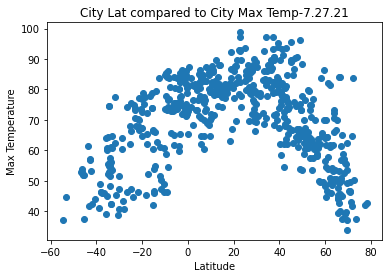

In [12]:
Lat = weatherDF['Latitude']
Temp = weatherDF['Max Temp']

plt.scatter(Lat,Temp)
plt.title('City Lat compared to City Max Temp-7.27.21')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.savefig('../Images/ScatterPlotTempLat.png')
plt.show()

## Latitude vs. Humidity Plot

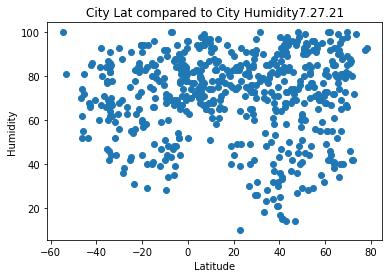

In [13]:
Lat = weatherDF['Latitude']
Hum = weatherDF['Humidity']

plt.scatter(Lat,Hum)
plt.title('City Lat compared to City Humidity7.27.21')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('../Images/ScatterPlotHumLat.png')
plt.show()

## Latitude vs. Cloudiness Plot

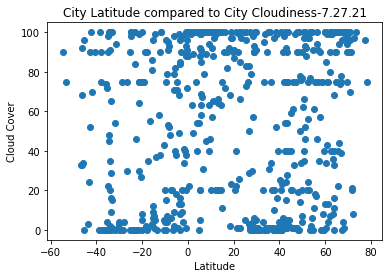

In [14]:
Lat = weatherDF['Latitude']
Cld = weatherDF['Cloudiness']

plt.scatter(Lat,Cld)
plt.title('City Latitude compared to City Cloudiness-7.27.21')
plt.xlabel('Latitude')
plt.ylabel('Cloud Cover')
plt.savefig('../Images/ScatterPlotCldLat.png')
plt.show()

## Latitude vs. Wind Speed Plot

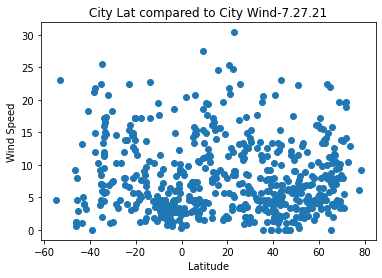

In [15]:
Lat = weatherDF['Latitude']
Wind = weatherDF['Wind Speed']

plt.scatter(Lat,Wind)
plt.title('City Lat compared to City Wind-7.27.21')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('../Images/ScatterPlotWindLat.png')
plt.show()

## Linear Regression

In [16]:
# This makes two dataframes, one for at or over the equator and one for lower, then there is the function for linear regression
NHemi = weatherDF[weatherDF['Latitude']>=0]
SHemi = weatherDF[weatherDF['Latitude']<0]
def plot_linear_regression(x, y, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = slope * x + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=12,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.6262273700148977


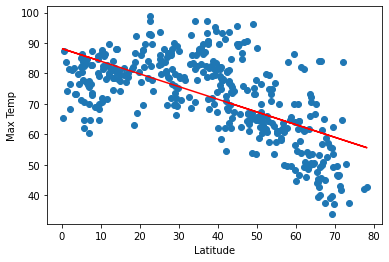

<Figure size 432x288 with 0 Axes>

In [17]:
#This compares the max temp and latitutde of cities in the northern hemisphere, 
#it shows a negative correlation meaning that as the latitude increases the max tempurature decreases, the strength of correlation
#is fairly strong
x = NHemi["Latitude"]
y = NHemi["Max Temp"]
plot_linear_regression(x,y,'Max Temp',(6,30))

plt.savefig('../Images/NHTempLat')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6752075327110598


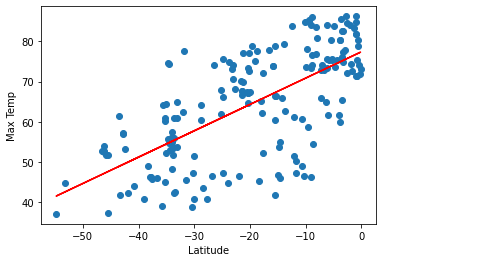

<Figure size 432x288 with 0 Axes>

In [18]:
#This compares the max temp and latitutde of cities in the southern hemisphere, 
#it shows a positive correlation meaning that as the latitude increases towards 0 the max tempurature also increases.  
#The strength of
#correlation is fairly strong, stronger than the negative correlatoin shown in the above plot
x = SHemi["Latitude"]
y = SHemi["Max Temp"]
plot_linear_regression(x,y,'Max Temp',(6,30))

plt.savefig('../Images/SHTempLat')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.06883127736226685


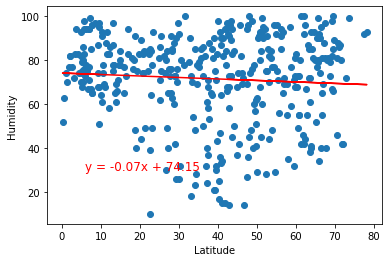

<Figure size 432x288 with 0 Axes>

In [26]:
#This plot shows minimal negative correlation between humidity and latitude
x = NHemi["Latitude"]
y = NHemi["Humidity"]
plot_linear_regression(x,y,'Humidity',(6,30))

plt.savefig('../Images/NHHumLat')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.04998363693045682


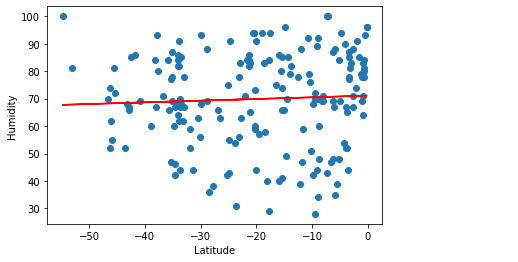

<Figure size 432x288 with 0 Axes>

In [25]:
#This plot shows minimal correlation between humidity and latitude
x = SHemi["Latitude"]
y = SHemi["Humidity"]
plot_linear_regression(x,y,'Humidity',(6,30))

plt.savefig('../Images/SHHumLat')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.0788074073163856


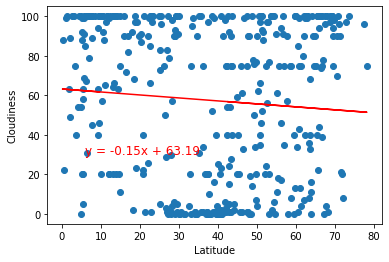

<Figure size 432x288 with 0 Axes>

In [21]:
#This plot shows minimal negative correlation between cloudiness and latitude
x = NHemi["Latitude"]
y = NHemi["Cloudiness"]
plot_linear_regression(x,y,'Cloudiness',(6,30))

plt.savefig('../Images/NHCldLat')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.007234061188677211


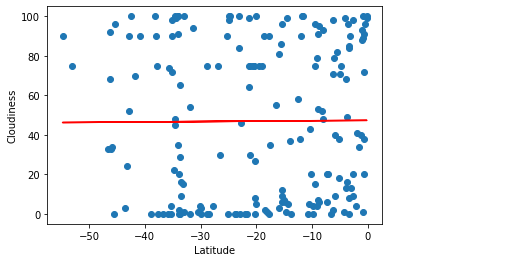

<Figure size 432x288 with 0 Axes>

In [22]:
#This plot shows minimal correlation between cloudiness and latitude
x = SHemi["Latitude"]
y = SHemi["Cloudiness"]
plot_linear_regression(x,y,'Cloudiness',(6,30))

plt.savefig('../Images/SHCldLat')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.061776566614600625


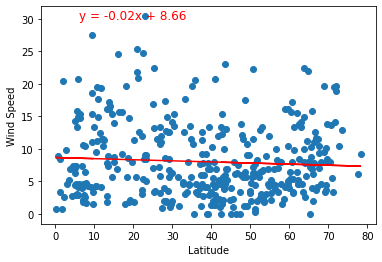

<Figure size 432x288 with 0 Axes>

In [23]:
#This plot shows minimal negative correlation between wind speed and latitude
x = NHemi["Latitude"]
y = NHemi["Wind Speed"]
plot_linear_regression(x,y,'Wind Speed',(6,30))

plt.savefig('../Images/NHWindLat')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.28396853293438906


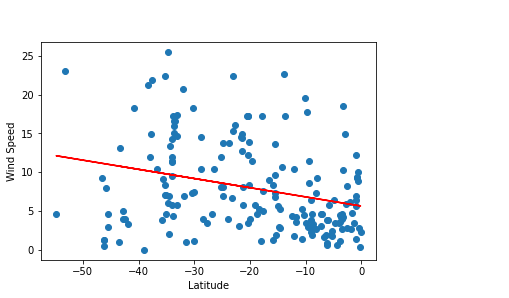

<Figure size 432x288 with 0 Axes>

In [24]:
#This plot shows minimal negative correlation between windspeed and latitude
x = SHemi["Latitude"]
y = SHemi["Wind Speed"]
plot_linear_regression(x,y,'Wind Speed',(6,30))

plt.savefig('../Images/SHWindLat')